In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style='whitegrid')

# Load the master_df dataset
master_df = pd.read_csv('clv_starter.csv')

# Display the first few rows of the dataset
master_df.head()

/var/folders/fy/xzkbv6m94mnbyhk_sp_6mpmw0000gn/T/ipykernel_22836/2819021211.py:11: DtypeWarning: Columns (9,14,15,16,17,22,23,24,25,26,27,33) have mixed types. Specify dtype option on import or set low_memory=False.
  master_df = pd.read_csv('clv_starter.csv')


,customer_id,Recency,Frequency,Monetary,Avg_Interval,R_Score,F_Score,M_Score,RFM_Score,Segment,...,order_processed_at,order_line_price,order_volume,total_spent,average_order_value,order_frequency,product_title,created_at,cancelled_at,subscription_status
0,2.823890e+12,144.0,21.0,1012.96,65.75,4.0,5.0,5.0,14.0,Whales,...,2020-08-31 06:43:22,9.5,1.0,9.5,9.5,1.0,Reusable Glass Trigger Spray Silicone Sleeve -...,2022-02-17 08:48:52,2022-04-15 06:39:14,Cancelled
1,2.823890e+12,144.0,21.0,1012.96,65.75,4.0,5.0,5.0,14.0,Whales,...,2020-08-31 06:43:22,9.5,1.0,9.5,9.5,1.0,Reusable Glass Trigger Spray Silicone Sleeve -...,2022-04-15 06:33:04,2022-07-16 17:04:50,Cancelled
2,2.823890e+12,144.0,21.0,1012.96,65.75,4.0,5.0,5.0,14.0,Whales,...,2020-08-31 06:43:22,9.5,1.0,9.5,9.5,1.0,Reusable Glass Trigger Spray Silicone Sleeve -...,2021-01-16 08:07:29,2021-03-16 14:18:35,Cancelled
3,2.823890e+12,144.0,21.0,1012.96,65.75,4.0,5.0,5.0,14.0,Whales,...,2020-08-31 06:43:22,9.5,1.0,9.5,9.5,1.0,Reusable Glass Trigger Spray Silicone Sleeve -...,2021-11-24 20:37:39,2022-02-17 08:42:13,Cancelled
4,2.823890e+12,144.0,21.0,1012.96,65.75,4.0,5.0,5.0,14.0,Whales,...,2020-08-31 06:43:22,9.5,1.0,9.5,9.5,1.0,Reusable Glass Trigger Spray Silicone Sleeve -...,2023-03-22 06:03:28,2024-02-08 15:07:05,Cancelled


In [35]:
# Count of unique customer IDs in the 'customer_id' column of rfm_df
unique_customer_count = master_df['customer_id'].nunique()

# Display the count of unique customer IDs
print(f"Count of unique customer IDs: {unique_customer_count}")


Count of unique customer IDs: 76496


In [36]:
master_df['R_Score'] = master_df['R_Score'].astype('Int64')
master_df['F_Score'] = master_df['F_Score'].astype('Int64')
master_df['M_Score'] = master_df['M_Score'].astype('Int64')



In [37]:
master_df.head()

,customer_id,Recency,Frequency,Monetary,Avg_Interval,R_Score,F_Score,M_Score,RFM_Score,Segment,...,order_processed_at,order_line_price,order_volume,total_spent,average_order_value,order_frequency,product_title,created_at,cancelled_at,subscription_status
0,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2020-08-31 06:43:22,9.5,1.0,9.5,9.5,1.0,Reusable Glass Trigger Spray Silicone Sleeve -...,2022-02-17 08:48:52,2022-04-15 06:39:14,Cancelled
1,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2020-08-31 06:43:22,9.5,1.0,9.5,9.5,1.0,Reusable Glass Trigger Spray Silicone Sleeve -...,2022-04-15 06:33:04,2022-07-16 17:04:50,Cancelled
2,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2020-08-31 06:43:22,9.5,1.0,9.5,9.5,1.0,Reusable Glass Trigger Spray Silicone Sleeve -...,2021-01-16 08:07:29,2021-03-16 14:18:35,Cancelled
3,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2020-08-31 06:43:22,9.5,1.0,9.5,9.5,1.0,Reusable Glass Trigger Spray Silicone Sleeve -...,2021-11-24 20:37:39,2022-02-17 08:42:13,Cancelled
4,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2020-08-31 06:43:22,9.5,1.0,9.5,9.5,1.0,Reusable Glass Trigger Spray Silicone Sleeve -...,2023-03-22 06:03:28,2024-02-08 15:07:05,Cancelled


In [38]:
# Import necessary libraries
import pandas as pd
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.utils import summary_data_from_transaction_data

# Ensure that order_processed_at is in datetime format
master_df['order_processed_at'] = pd.to_datetime(master_df['order_processed_at'], errors='coerce')

# Drop rows with missing dates
master_df = master_df.dropna(subset=['order_processed_at'])

# Generate the summary data required for the BG/NBD model
summary = summary_data_from_transaction_data(
    master_df, 
    'customer_id', 
    'order_processed_at', 
    monetary_value_col='total_spent',  # Ensure this column reflects the total monetary value per transaction
    observation_period_end=master_df['order_processed_at'].max()  # Use the maximum date from the cleaned data
)

# Remove rows with non-positive monetary values before fitting the Gamma-Gamma model
summary = summary[summary['monetary_value'] > 0]

# Fit the BG/NBD model to predict future transactions
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

# Predict the number of transactions for the next 2 years (730 days)
summary['predicted_purchases_2_years'] = bgf.predict(730, summary['frequency'], summary['recency'], summary['T'])

# Fit the Gamma-Gamma model to predict the monetary value of transactions
ggf = GammaGammaFitter(penalizer_coef=0.0)
ggf.fit(summary['frequency'], summary['monetary_value'])

# Predict the average monetary value per transaction
summary['predicted_avg_monetary_value'] = ggf.conditional_expected_average_profit(
    summary['frequency'],
    summary['monetary_value']
)

# Calculate CLV for 2 years: predicted purchases * predicted average monetary value
summary['CLV_2_years'] = summary['predicted_purchases_2_years'] * summary['predicted_avg_monetary_value']

# Display results using pandas
display(summary.head())  # Use display() if in a Jupyter environment


,frequency,recency,T,monetary_value,predicted_purchases_2_years,predicted_avg_monetary_value,CLV_2_years
customer_id,,,,,,,
2.823890e+12,19.0,1316.0,1401.0,762.639474,8.574564,773.143833,6629.370964
2.824034e+12,1.0,265.0,1334.0,25.000000,0.069380,92.475196,6.415939
2.824200e+12,57.0,1482.0,1483.0,23700.791053,23.461536,23782.639870,557977.253420
2.824312e+12,18.0,1025.0,1039.0,1175.044444,10.595251,1190.633968,12615.065534
2.824370e+12,50.0,1452.0,1483.0,45836.013600,20.504922,46015.623057,943546.741473


In [39]:
# Reset the index to make customer_id a normal column
summary_reset = summary.reset_index()

# Display the modified DataFrame
display(summary_reset.head())  # Use display() in a Jupyter environment or print(summary_reset.head()) otherwise


,customer_id,frequency,recency,T,monetary_value,predicted_purchases_2_years,predicted_avg_monetary_value,CLV_2_years
0,2.823890e+12,19.0,1316.0,1401.0,762.639474,8.574564,773.143833,6629.370964
1,2.824034e+12,1.0,265.0,1334.0,25.000000,0.069380,92.475196,6.415939
2,2.824200e+12,57.0,1482.0,1483.0,23700.791053,23.461536,23782.639870,557977.253420
3,2.824312e+12,18.0,1025.0,1039.0,1175.044444,10.595251,1190.633968,12615.065534
4,2.824370e+12,50.0,1452.0,1483.0,45836.013600,20.504922,46015.623057,943546.741473


In [40]:
# Ensure 'customer_id' is a normal column by resetting the index if not already done
summary_reset = summary.reset_index()

# Count of unique customer IDs in the 'customer_id' column
unique_customer_count = summary_reset['customer_id'].nunique()

# Display the count of unique customer IDs
print(f"Count of unique customer IDs: {unique_customer_count}")


Count of unique customer IDs: 32597


In [41]:
# Reset the index of the summary DataFrame to make 'customer_id' a normal column
summary_reset = summary.reset_index()

# Merge master_df and summary_reset on customer_id using a left join
merged_df = pd.merge(master_df, summary_reset, on='customer_id', how='left')

# Drop rows where CLV_2_years is NaN
merged_df_clean = merged_df.dropna(subset=['CLV_2_years'])

# Display the cleaned merged DataFrame
display(merged_df_clean.head())  # Use display() in a Jupyter environment or print(merged_df_clean.head()) otherwise


,customer_id,Recency,Frequency,Monetary,Avg_Interval,R_Score,F_Score,M_Score,RFM_Score,Segment,...,created_at,cancelled_at,subscription_status,frequency,recency,T,monetary_value,predicted_purchases_2_years,predicted_avg_monetary_value,CLV_2_years
0,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2022-02-17 08:48:52,2022-04-15 06:39:14,Cancelled,19.0,1316.0,1401.0,762.639474,8.574564,773.143833,6629.370964
1,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2022-04-15 06:33:04,2022-07-16 17:04:50,Cancelled,19.0,1316.0,1401.0,762.639474,8.574564,773.143833,6629.370964
2,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2021-01-16 08:07:29,2021-03-16 14:18:35,Cancelled,19.0,1316.0,1401.0,762.639474,8.574564,773.143833,6629.370964
3,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2021-11-24 20:37:39,2022-02-17 08:42:13,Cancelled,19.0,1316.0,1401.0,762.639474,8.574564,773.143833,6629.370964
4,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2023-03-22 06:03:28,2024-02-08 15:07:05,Cancelled,19.0,1316.0,1401.0,762.639474,8.574564,773.143833,6629.370964


In [42]:
# Count of unique customer IDs in the 'customer_id' column of rfm_df
unique_customer_count = master_df['customer_id'].nunique()

# Display the count of unique customer IDs
print(f"Count of unique customer IDs: {unique_customer_count}")


Count of unique customer IDs: 76493


In [43]:
# Rename columns to remove '2_years' from their names
summary_reset = summary_reset.rename(columns={
    'predicted_purchases_2_years': 'predicted_purchases',
    'predicted_avg_monetary_value': 'predicted_avg_monetary_value',  # This column name remains the same
    'CLV_2_years': 'CLV'
})

# Display the modified DataFrame
display(summary_reset.head())  # Use display() if in a Jupyter environment or print(summary_reset.head()) otherwise

master_df = merged_df

,customer_id,frequency,recency,T,monetary_value,predicted_purchases,predicted_avg_monetary_value,CLV
0,2.823890e+12,19.0,1316.0,1401.0,762.639474,8.574564,773.143833,6629.370964
1,2.824034e+12,1.0,265.0,1334.0,25.000000,0.069380,92.475196,6.415939
2,2.824200e+12,57.0,1482.0,1483.0,23700.791053,23.461536,23782.639870,557977.253420
3,2.824312e+12,18.0,1025.0,1039.0,1175.044444,10.595251,1190.633968,12615.065534
4,2.824370e+12,50.0,1452.0,1483.0,45836.013600,20.504922,46015.623057,943546.741473


In [44]:
master_df = master_df.rename(columns={
    'predicted_purchases_2_years': 'predicted_purchases',
    'predicted_avg_monetary_value': 'predicted_avg_monetary_value',  # Keep as is if the name matches
    'CLV_2_years': 'CLV'  # Update this if necessary based on the actual column name
})

# Display the modified DataFrame to confirm the changes
display(master_df.head())  # Use display() if in a Jupyter

,customer_id,Recency,Frequency,Monetary,Avg_Interval,R_Score,F_Score,M_Score,RFM_Score,Segment,...,created_at,cancelled_at,subscription_status,frequency,recency,T,monetary_value,predicted_purchases,predicted_avg_monetary_value,CLV
0,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2022-02-17 08:48:52,2022-04-15 06:39:14,Cancelled,19.0,1316.0,1401.0,762.639474,8.574564,773.143833,6629.370964
1,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2022-04-15 06:33:04,2022-07-16 17:04:50,Cancelled,19.0,1316.0,1401.0,762.639474,8.574564,773.143833,6629.370964
2,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2021-01-16 08:07:29,2021-03-16 14:18:35,Cancelled,19.0,1316.0,1401.0,762.639474,8.574564,773.143833,6629.370964
3,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2021-11-24 20:37:39,2022-02-17 08:42:13,Cancelled,19.0,1316.0,1401.0,762.639474,8.574564,773.143833,6629.370964
4,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2023-03-22 06:03:28,2024-02-08 15:07:05,Cancelled,19.0,1316.0,1401.0,762.639474,8.574564,773.143833,6629.370964


In [45]:
# Assuming the merged DataFrame is merged_df_clean from previous steps
# Calculate the average R, F, M, and CLV values for each segment
avg_rfm_per_segment = master_df.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CLV': 'mean',
    'RFM_Score': 'mean'
}).reset_index()

# Rename columns for clarity
avg_rfm_per_segment.columns = ['Segment', 'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Avg_CLV', 'Avg_RFM_Score']

# Display the average R, F, M, CLV, and RFM Score values for each segment
print(avg_rfm_per_segment)


   Segment  Avg_Recency  Avg_Frequency  Avg_Monetary        Avg_CLV  \
0  Average   408.956475      16.625536   4968.345886   97881.174805   
1   Lapsed  1020.656589       1.606443     37.146454      44.496356   
2   Whales    91.301728      21.615153   7221.717416  138037.821394   

   Avg_RFM_Score  
0      11.493264  
1       7.662369  
2      14.332941  


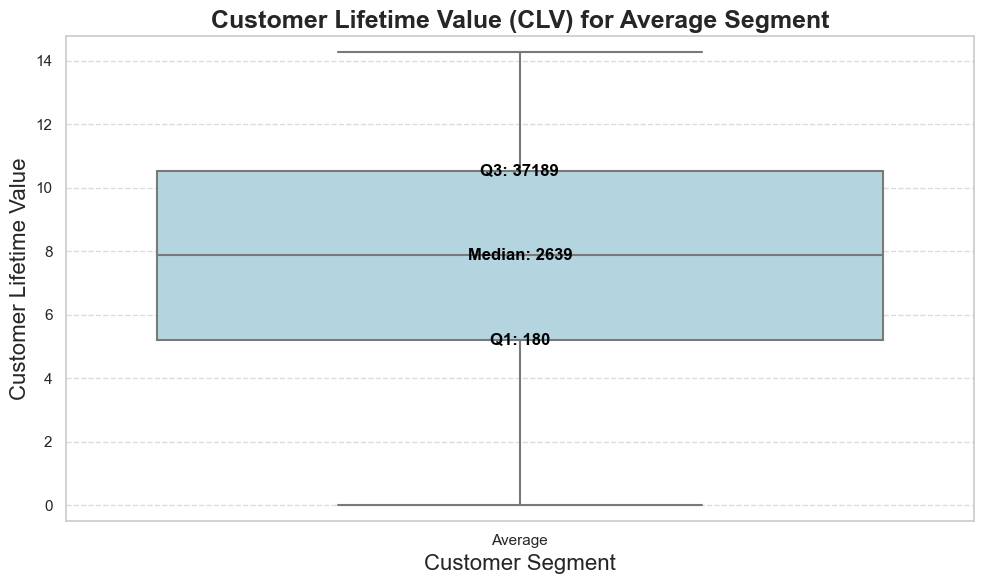

In [46]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Filter data for the 'Average' segment
average_data = master_df[master_df['Segment'] == 'Average']

# Check if there are records for the 'Average' segment
if not average_data.empty:
    # Apply log transformation to CLV to handle skewness (optional)
    average_data['Log_CLV'] = np.log1p(average_data['CLV'])  # Using log1p to avoid issues with log(0)
    
    # Set up the plot for the 'Average' segment
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Segment', y='Log_CLV', data=average_data, color='lightblue', showfliers=False)

    # Add a title and labels
    plt.title('Customer Lifetime Value (CLV) for Average Segment', fontsize=18, fontweight='bold')
    plt.xlabel('Customer Segment', fontsize=16)
    plt.ylabel('Customer Lifetime Value', fontsize=16)

    # Annotate the quartiles for the 'Average' segment with log transformation
    q1 = average_data['Log_CLV'].quantile(0.25)
    median = average_data['Log_CLV'].median()
    q3 = average_data['Log_CLV'].quantile(0.75)

    plt.text(0, q1, f'Q1: {np.expm1(q1):.0f}', ha='center', va='center', fontweight='bold', color='black', fontsize=12)
    plt.text(0, median, f'Median: {np.expm1(median):.0f}', ha='center', va='center', fontweight='bold', color='black', fontsize=12)
    plt.text(0, q3, f'Q3: {np.expm1(q3):.0f}', ha='center', va='center', fontweight='bold', color='black', fontsize=12)

    # Adjust y-axis limits based on the log-transformed values
    plt.ylim(average_data['Log_CLV'].min() - 0.5, average_data['Log_CLV'].max() + 0.5)

    # Display grid lines for clarity
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Improve layout
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("No data available for the 'Average' segment.")


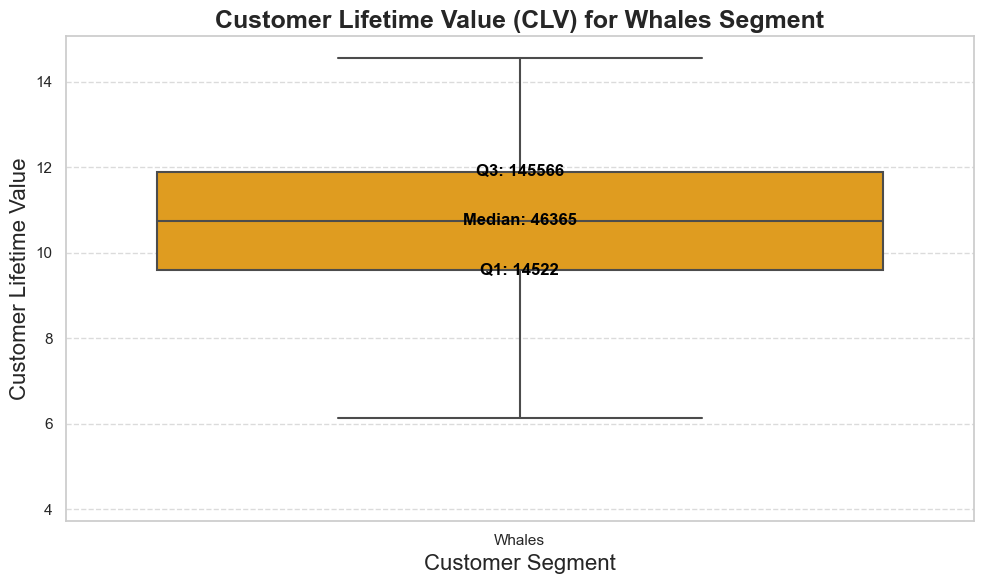

In [47]:
# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Filter data for the 'Whales' segment
whales_data = master_df[master_df['Segment'] == 'Whales']

# Check if there are records for the 'Whales' segment
if not whales_data.empty:
    # Apply log transformation to CLV to handle skewness
    whales_data['Log_CLV'] = np.log1p(whales_data['CLV'])  # Using log1p to handle zero or very small values

    # Set up the plot for the 'Whales' segment
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Segment', y='Log_CLV', data=whales_data, color='orange', showfliers=False)

    # Add a title and labels
    plt.title('Customer Lifetime Value (CLV) for Whales Segment', fontsize=18, fontweight='bold')
    plt.xlabel('Customer Segment', fontsize=16)
    plt.ylabel('Customer Lifetime Value', fontsize=16)

    # Annotate the quartiles for the 'Whales' segment with log transformation
    q1 = whales_data['Log_CLV'].quantile(0.25)
    median = whales_data['Log_CLV'].median()
    q3 = whales_data['Log_CLV'].quantile(0.75)

    plt.text(0, q1, f'Q1: {np.expm1(q1):.0f}', ha='center', va='center', fontweight='bold', color='black', fontsize=12)
    plt.text(0, median, f'Median: {np.expm1(median):.0f}', ha='center', va='center', fontweight='bold', color='black', fontsize=12)
    plt.text(0, q3, f'Q3: {np.expm1(q3):.0f}', ha='center', va='center', fontweight='bold', color='black', fontsize=12)

    # Adjust y-axis limits
    plt.ylim(whales_data['Log_CLV'].min() - 0.5, whales_data['Log_CLV'].max() + 0.5)

    # Display grid lines for clarity
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Improve layout
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("No data available for the 'Whales' segment.")


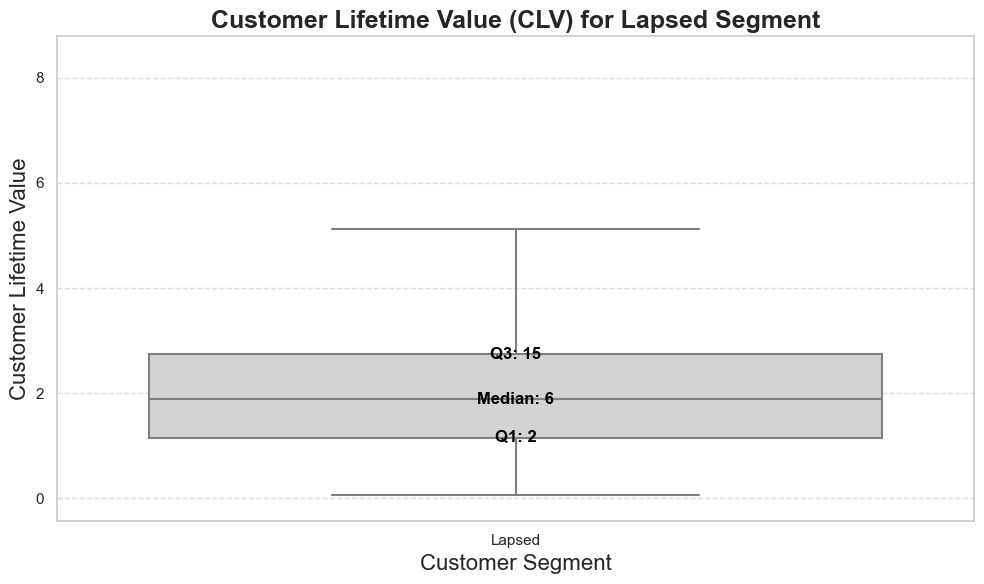

In [62]:
# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Filter data for the 'Lapsed' segment
lapsed_data = master_df[master_df['Segment'] == 'Lapsed']

# Check if there are records for the 'Lapsed' segment
if not lapsed_data.empty:
    # Apply log transformation to CLV to handle skewness
    lapsed_data['Log_CLV'] = np.log1p(lapsed_data['CLV'])  # Using log1p to handle zero or very small values

    # Set up the plot for the 'Lapsed' segment
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Segment', y='Log_CLV', data=lapsed_data, color='lightgrey', showfliers=False)

    # Add a title and labels
    plt.title('Customer Lifetime Value (CLV) for Lapsed Segment', fontsize=18, fontweight='bold')
    plt.xlabel('Customer Segment', fontsize=16)
    plt.ylabel('Customer Lifetime Value', fontsize=16)

    # Annotate the quartiles for the 'Lapsed' segment with log transformation
    q1 = lapsed_data['Log_CLV'].quantile(0.25)
    median = lapsed_data['Log_CLV'].median()
    q3 = lapsed_data['Log_CLV'].quantile(0.75)

    plt.text(0, q1, f'Q1: {np.expm1(q1):.0f}', ha='center', va='center', fontweight='bold', color='black', fontsize=12)
    plt.text(0, median, f'Median: {np.expm1(median):.0f}', ha='center', va='center', fontweight='bold', color='black', fontsize=12)
    plt.text(0, q3, f'Q3: {np.expm1(q3):.0f}', ha='center', va='center', fontweight='bold', color='black', fontsize=12)

    # Adjust y-axis limits
    plt.ylim(lapsed_data['Log_CLV'].min() - 0.5, lapsed_data['Log_CLV'].max() + 0.5)

    # Display grid lines for clarity
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Improve layout
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("No data available for the 'Lapsed' segment.")


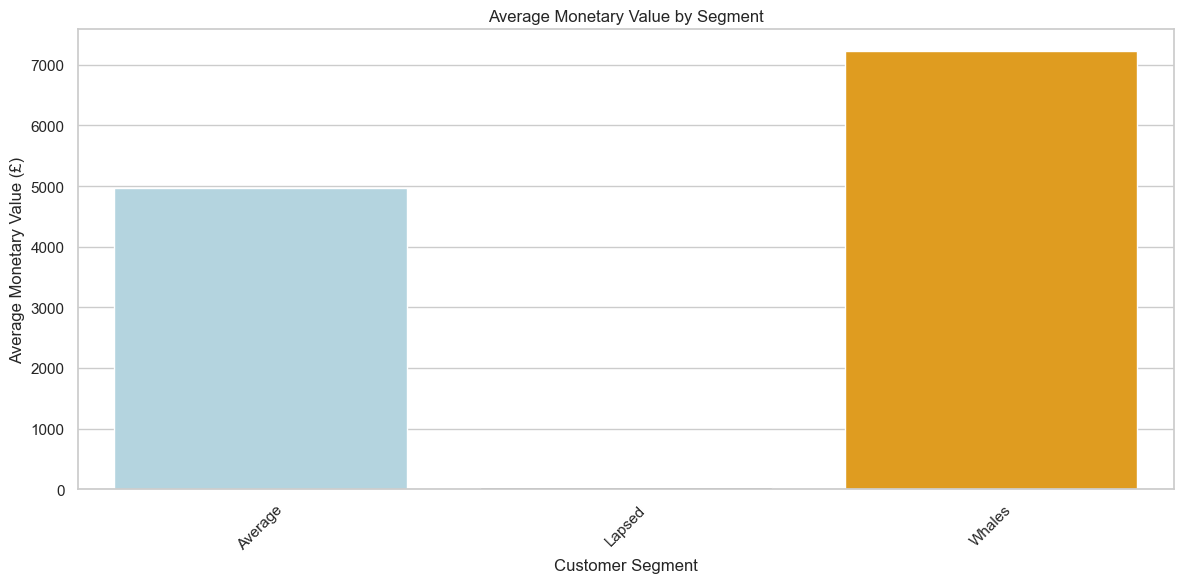

In [63]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Calculate the average monetary value by segment
avg_monetary_by_segment = master_df.groupby('Segment')['Monetary'].mean().reset_index()

# Define a color palette with specific colors for each segment
palette = {'Whales': 'orange', 'Average': 'lightblue', 'Lapsed': 'grey'}

# Create the bar plot with the specified colors
sns.barplot(x='Segment', y='Monetary', data=avg_monetary_by_segment, palette=palette)

# Add title and labels
plt.title('Average Monetary Value by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Monetary Value (£)')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


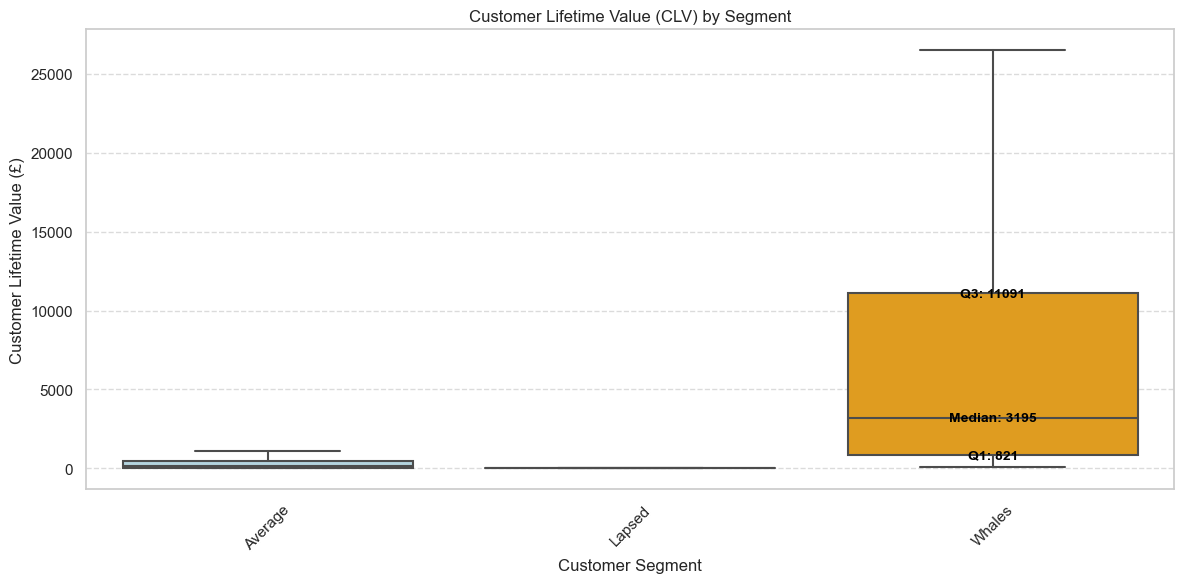

In [84]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure that 'Segment' and 'customer_id' grouping gives unique customers
unique_clv_df = master_df.groupby(['Segment', 'customer_id'])['CLV'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Define a color palette with specific colors for each segment
palette = {'Whales': 'orange', 'Average': 'lightblue', 'Lapsed': 'lightgrey'}

# Create the box plot with the specified colors for each segment
sns.boxplot(x='Segment', y='CLV', data=unique_clv_df, palette=palette, showfliers=False, linewidth=1.5)

# Add borders to the boxes
for i, box in enumerate(plt.gca().artists):
    box.set_edgecolor('black')
    box.set_linewidth(1.5)

# Annotate the quartiles on the boxplot
segments = unique_clv_df['Segment'].unique()
for i, segment in enumerate(segments):
    clv_data = unique_clv_df[unique_clv_df['Segment'] == segment]['CLV']
    q1 = np.percentile(clv_data, 25)
    median = np.percentile(clv_data, 50)
    q3 = np.percentile(clv_data, 75)

    # Annotate Q1, Median, and Q3
    plt.text(i, q1, f'Q1: {q1:.0f}', ha='center', va='center', fontweight='bold', color='black', fontsize=10)
    plt.text(i, median, f'Median: {median:.0f}', ha='center', va='center', fontweight='bold', color='black', fontsize=10)
    plt.text(i, q3, f'Q3: {q3:.0f}', ha='center', va='center', fontweight='bold', color='black', fontsize=10)

# Add title and labels
plt.title('Customer Lifetime Value (CLV) by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Customer Lifetime Value (£)')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


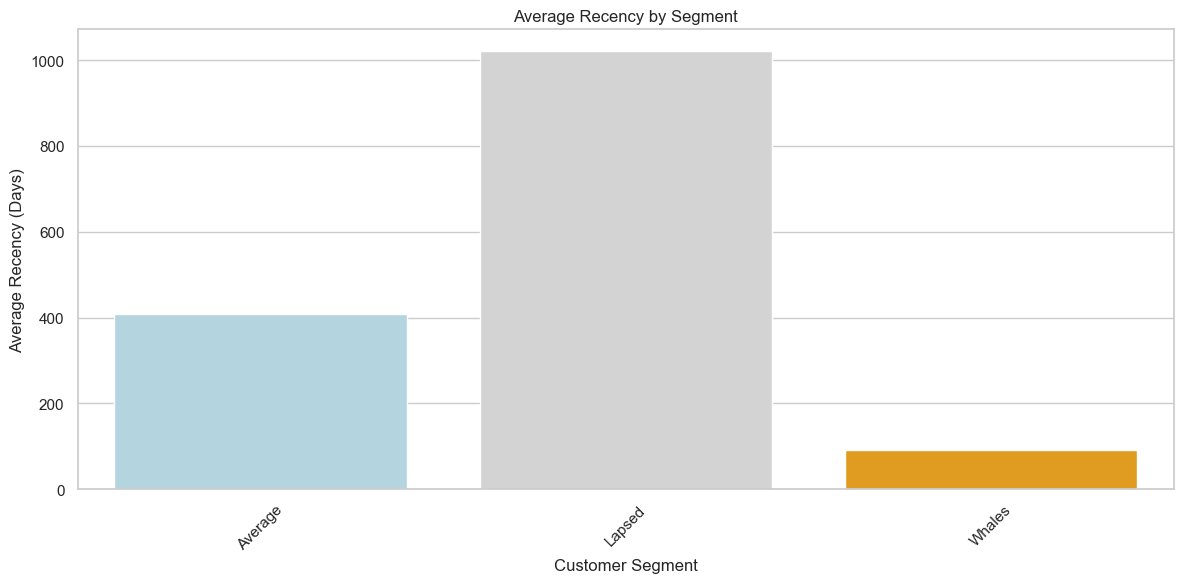

In [65]:
# Average Recency by Segment
plt.figure(figsize=(12, 6))

palette = {'Whales': 'orange', 'Average': 'lightblue', 'Lapsed': 'lightgrey'}
avg_recency_by_segment = master_df.groupby('Segment')['Recency'].mean().reset_index()
sns.barplot(x='Segment', y='Recency', data=avg_recency_by_segment, palette=palette)

# Add title and labels
plt.title('Average Recency by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Recency (Days)')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


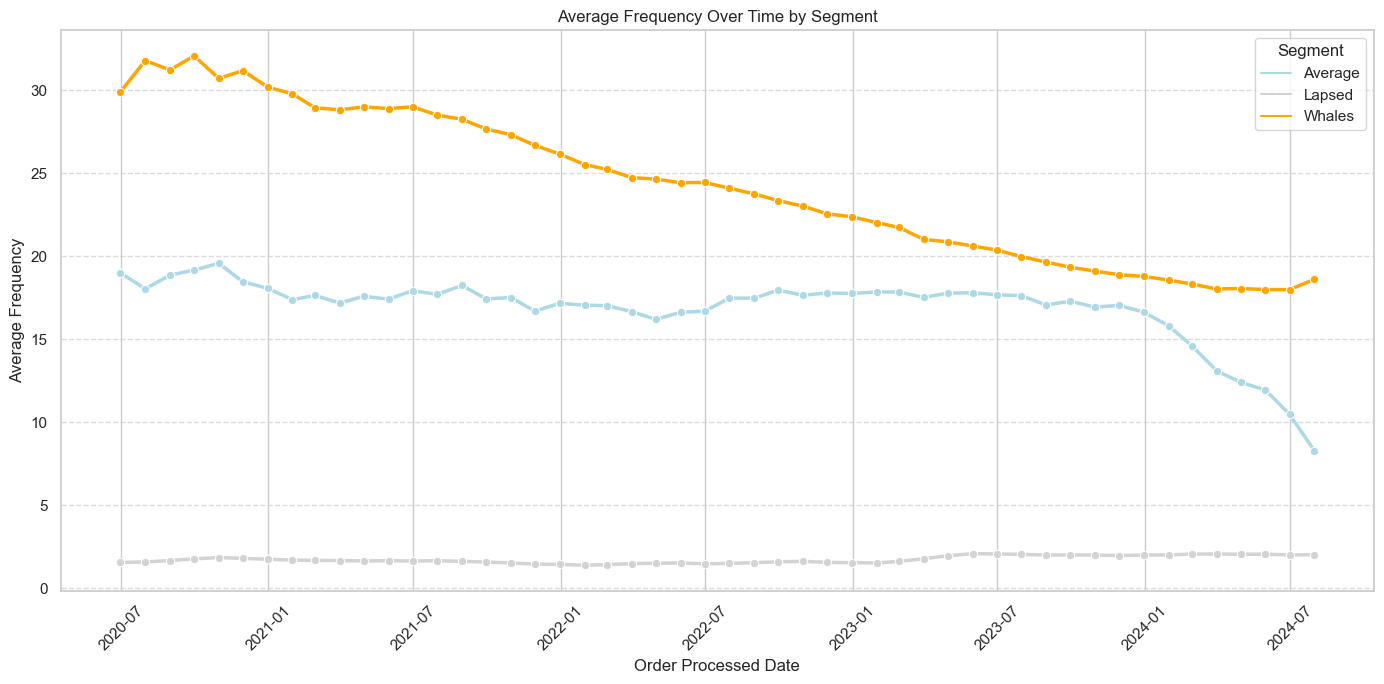

In [66]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Ensure 'order_processed_at' is in datetime format
master_df['order_processed_at'] = pd.to_datetime(master_df['order_processed_at'])

# Resample data by month to reduce the number of data points
avg_frequency_by_segment = master_df.set_index('order_processed_at').groupby('Segment')['Frequency'].resample('M').mean().reset_index()

# Apply a rolling average to smooth the line
avg_frequency_by_segment['Rolling_Frequency'] = avg_frequency_by_segment.groupby('Segment')['Frequency'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# Set up the plot for the Average Frequency Over Time by Segment
plt.figure(figsize=(14, 7))

# Define a custom color palette for the segments
palette = {'Whales': 'orange', 'Average': 'lightblue', 'Lapsed': 'lightgrey'}

# Create the line plot with specified colors for each segment
sns.lineplot(
    x='order_processed_at', 
    y='Rolling_Frequency', 
    hue='Segment', 
    data=avg_frequency_by_segment, 
    marker='o', 
    linewidth=2.5, 
    palette=palette
)

# Add title and labels
plt.title('Average Frequency Over Time by Segment')
plt.xlabel('Order Processed Date')
plt.ylabel('Average Frequency')
plt.xticks(rotation=45)

# Display grid lines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


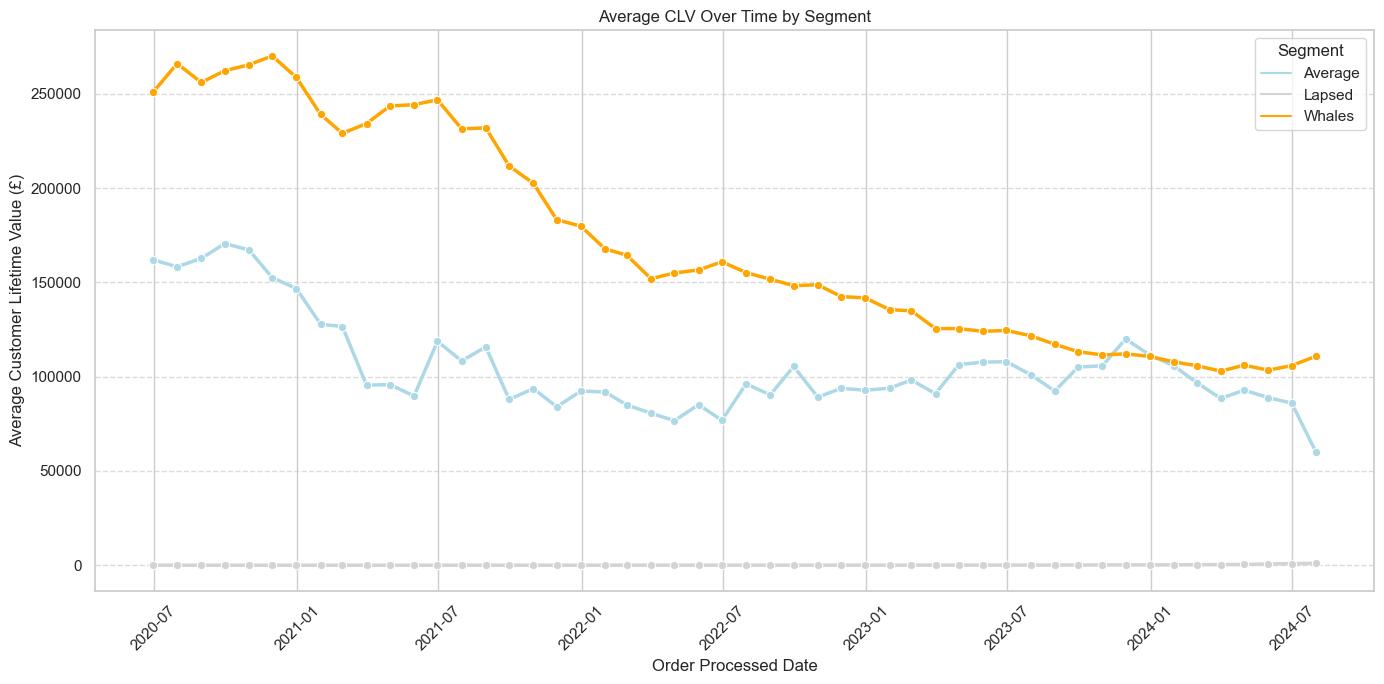

In [67]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'order_processed_at' is in datetime format
master_df['order_processed_at'] = pd.to_datetime(master_df['order_processed_at'])

# Resample data by month to reduce the number of data points and calculate average CLV by segment
avg_clv_by_segment = master_df.set_index('order_processed_at').groupby('Segment')['CLV'].resample('M').mean().reset_index()

# Apply a rolling average (e.g., 3-month rolling average) for smoothing
avg_clv_by_segment['Rolling_CLV'] = avg_clv_by_segment.groupby('Segment')['CLV'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# Set up the plot for the Average CLV Over Time by Segment
plt.figure(figsize=(14, 7))

# Define a custom color palette for the segments
palette = {'Whales': 'orange', 'Average': 'lightblue', 'Lapsed': 'lightgrey'}

# Create the line plot with specified colors for each segment
sns.lineplot(
    x='order_processed_at', 
    y='Rolling_CLV', 
    hue='Segment', 
    data=avg_clv_by_segment, 
    marker='o', 
    linewidth=2.5, 
    palette=palette
)

# Add title and labels
plt.title('Average CLV Over Time by Segment')
plt.xlabel('Order Processed Date')
plt.ylabel('Average Customer Lifetime Value (£)')
plt.xticks(rotation=45)

# Display grid lines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


In [68]:
# Save master_df as basket.csv
master_df.to_csv('basket.csv', index=False)

print("master_df has been saved as 'basket.csv'.")


master_df has been saved as 'basket.csv'.


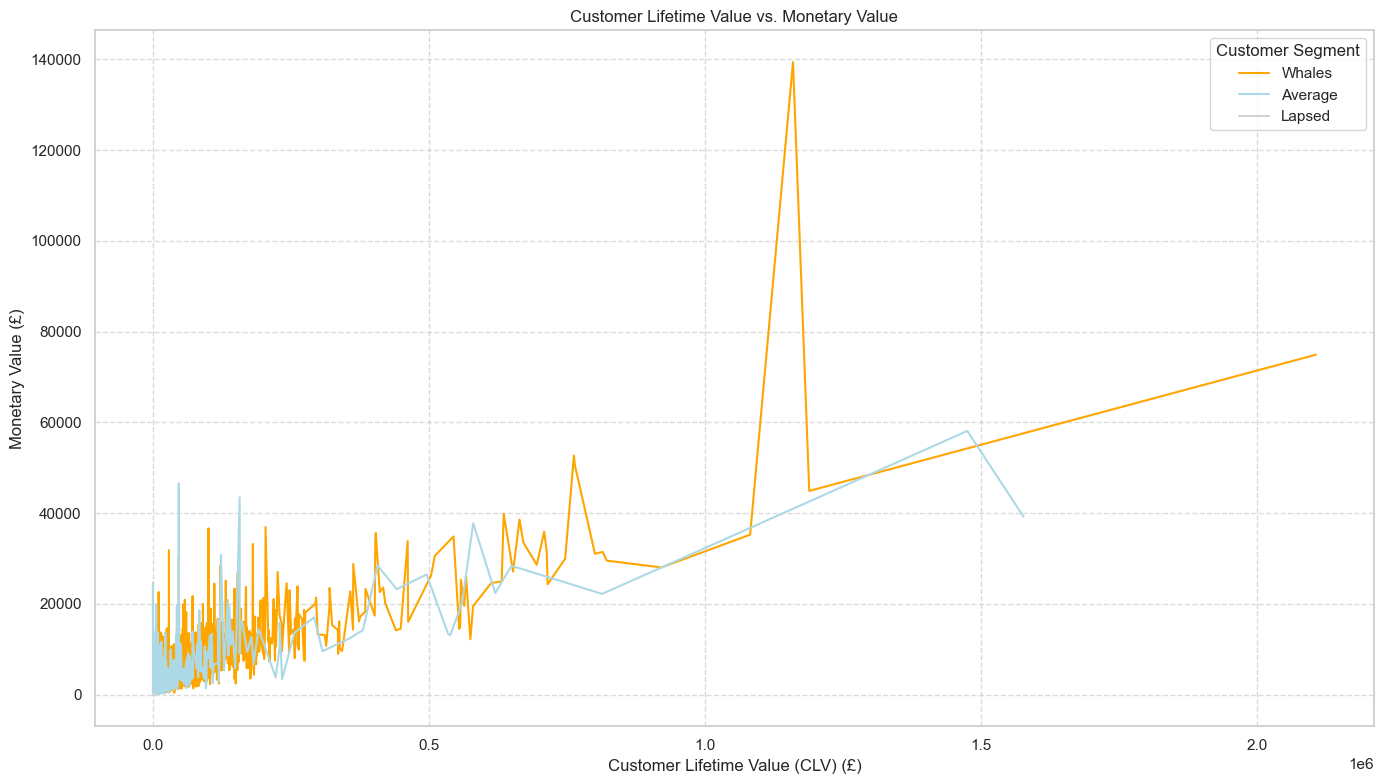

In [69]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Set up the plot size
plt.figure(figsize=(14, 8))

# Define a custom color palette for the segments
palette = {'Whales': 'orange', 'Average': 'lightblue', 'Lapsed': 'lightgrey'}

# Plotting Monetary vs CLV, colored by customer segment using the custom palette
sns.lineplot(
    x='CLV', 
    y='Monetary', 
    hue='Segment', 
    data=master_df,
    ci=None,
    palette=palette
)

# Customizing the plot
plt.title('Customer Lifetime Value vs. Monetary Value')
plt.xlabel('Customer Lifetime Value (CLV) (£)')
plt.ylabel('Monetary Value (£)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Customer Segment')

# Show plot
plt.tight_layout()
plt.show()


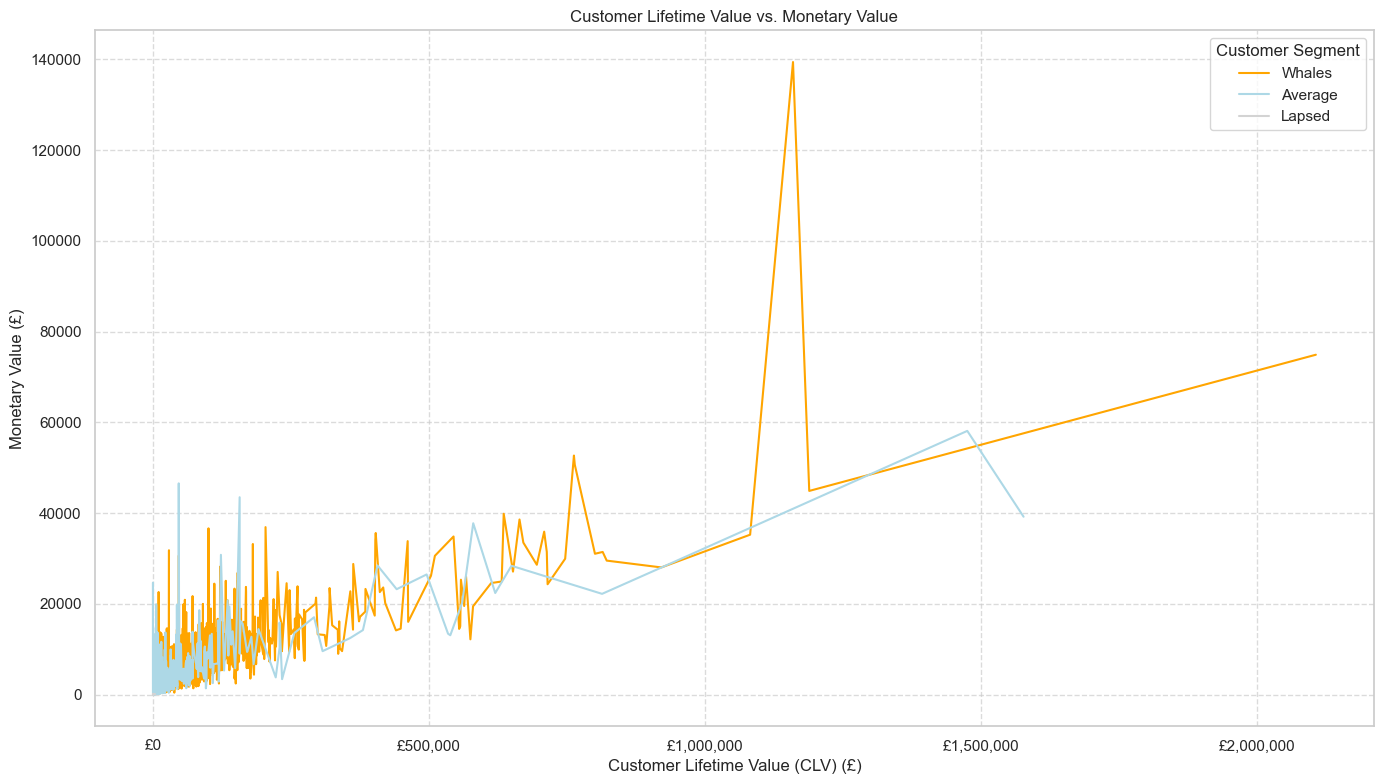

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Function to format the x-axis values as currency with commas
def currency(x, pos):
    return '£{:,.0f}'.format(x)

# Create the plot
plt.figure(figsize=(14, 8))

# Define a custom color palette for the segments
palette = {'Whales': 'orange', 'Average': 'lightblue', 'Lapsed': 'lightgrey'}

# Plotting Monetary vs CLV, colored by customer segment using the custom palette
sns.lineplot(
    x='CLV', 
    y='Monetary', 
    hue='Segment', 
    data=master_df,
    ci=None,
    palette=palette
)

# Customizing the plot
plt.title('Customer Lifetime Value vs. Monetary Value')
plt.xlabel('Customer Lifetime Value (CLV) (£)')
plt.ylabel('Monetary Value (£)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Customer Segment')

# Apply the currency formatting to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency))

# Show plot
plt.tight_layout()
plt.show()


In [71]:
master_df.head()

,customer_id,Recency,Frequency,Monetary,Avg_Interval,R_Score,F_Score,M_Score,RFM_Score,Segment,...,created_at,cancelled_at,subscription_status,frequency,recency,T,monetary_value,predicted_purchases,predicted_avg_monetary_value,CLV
0,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2022-02-17 08:48:52,2022-04-15 06:39:14,Cancelled,19.0,1316.0,1401.0,762.639474,8.574564,773.143833,6629.370964
1,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2022-04-15 06:33:04,2022-07-16 17:04:50,Cancelled,19.0,1316.0,1401.0,762.639474,8.574564,773.143833,6629.370964
2,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2021-01-16 08:07:29,2021-03-16 14:18:35,Cancelled,19.0,1316.0,1401.0,762.639474,8.574564,773.143833,6629.370964
3,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2021-11-24 20:37:39,2022-02-17 08:42:13,Cancelled,19.0,1316.0,1401.0,762.639474,8.574564,773.143833,6629.370964
4,2.823890e+12,144.0,21.0,1012.96,65.75,4,5,5,14.0,Whales,...,2023-03-22 06:03:28,2024-02-08 15:07:05,Cancelled,19.0,1316.0,1401.0,762.639474,8.574564,773.143833,6629.370964


In [72]:
master_df.columns

Index(['customer_id', 'Recency', 'Frequency', 'Monetary', 'Avg_Interval',
       'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'Segment', 'Cluster',
       'customer_email', 'first_name', 'last_name', 'customer_created_at',
       'orders_count', 'billing_address_address_1', 'billing_address_city',
       'billing_address_country', 'billing_address_country_code',
       'billing_address_first_name', 'billing_address_last_name',
       'billing_address_zip', 'buyer_accepts_marketing', 'product_type', 'sku',
       'title', 'order_processed_at', 'order_line_price', 'order_volume',
       'total_spent', 'average_order_value', 'order_frequency',
       'product_title', 'created_at', 'cancelled_at', 'subscription_status',
       'frequency', 'recency', 'T', 'monetary_value', 'predicted_purchases',
       'predicted_avg_monetary_value', 'CLV'],
      dtype='object')

In [73]:
import pandas as pd

# Load your master_df
# Assuming master_df is already loaded into your environment

# Define a function to describe customer profiles based on segment
def describe_profiles(df, segment_name):
    segment = df[df['Segment'] == segment_name]
    
    profile = {
        'Segment': segment_name,
        'Total_Customers': len(segment),
        'Avg_Recency': segment['Recency'].mean(),
        'Avg_Frequency': segment['Frequency'].mean(),
        'Avg_Monetary': segment['Monetary'].mean(),
        'Avg_CLV': segment['CLV'].mean(),
        'Common_Behavior': segment['product_title'].mode().values[:3],  # Top 3 most common products purchased
        'Goals': '',  # Placeholder for manual input based on insights
        'Description': '',  # Placeholder for manual input based on insights
        'Personality': '',  # Placeholder for manual input based on insights
        'Purchasing_Habits': '',  # Placeholder for manual input based on insights
    }
    
    return profile

# Create profiles for each segment
whales_profile = describe_profiles(master_df, 'Whales')
average_profile = describe_profiles(master_df, 'Average')
lapsed_profile = describe_profiles(master_df, 'Lapsed')

# Combine profiles into a DataFrame
profiles_df = pd.DataFrame([whales_profile, average_profile, lapsed_profile])

# Save the profiles to a CSV for review and editing
profiles_df.to_csv('customer_profiles.csv', index=False)

# Display profiles
profiles_df


,Segment,Total_Customers,Avg_Recency,Avg_Frequency,Avg_Monetary,Avg_CLV,Common_Behavior,Goals,Description,Personality,Purchasing_Habits
0,Whales,5662383,91.301728,21.615153,7221.717416,138037.821394,[Bower Washing Up Liquid - Grapefruit 1L],,,,
1,Average,2403932,408.956475,16.625536,4968.345886,97881.174805,[Bower Washing Up Liquid - Grapefruit 1L],,,,
2,Lapsed,66087,1020.656589,1.606443,37.146454,44.496356,[Bower Washing Up Liquid - Grapefruit 1L],,,,


In [74]:
# Top 10 customers based on spend
top_10_customers = df.groupby('customer_id')['total_spent'].sum().nlargest(10)

# Plot
plt.figure(figsize=(12, 8))
colors = sns.color_palette("Set2", len(top_10_customers))
top_10_customers.plot(kind='bar', color=colors)
plt.title('Top 10 Customers by Total Spend', fontsize=15)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Spent (GBP)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

NameError: name 'df' is not defined

In [78]:
# Describe the 'CLV' column to get summary statistics
clv_description = master_df['CLV'].describe()

# Display the summary statistics
clv_description


count    8.041353e+06
mean     1.365453e+05
std      2.737440e+05
min      1.307052e-04
25%      6.003528e+03
50%      3.065530e+04
75%      1.230865e+05
max      2.106952e+06
Name: CLV, dtype: float64

In [82]:
# Group by 'Segment' and 'customer_id' to ensure uniqueness, then calculate summary statistics for 'CLV'
clv_stats_per_segment = (
    master_df.groupby(['Segment', 'customer_id'])['CLV']
    .mean()  # Using mean in case there are multiple CLV entries per customer
    .groupby('Segment')  # Regroup by 'Segment' after ensuring uniqueness per customer
    .describe()
)

# Display the summary statistics per segment for unique customers
clv_stats_per_segment


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
Average,18400.0,1986.629098,24037.790741,0.000131,28.580920,135.323993,455.168117,1.577385e+06
Lapsed,3323.0,29.711839,109.326546,0.070914,1.815212,4.814608,13.629170,3.956421e+03
Whales,10867.0,15911.550495,54668.898347,67.054469,820.832410,3195.266603,11090.707625,2.106952e+06


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


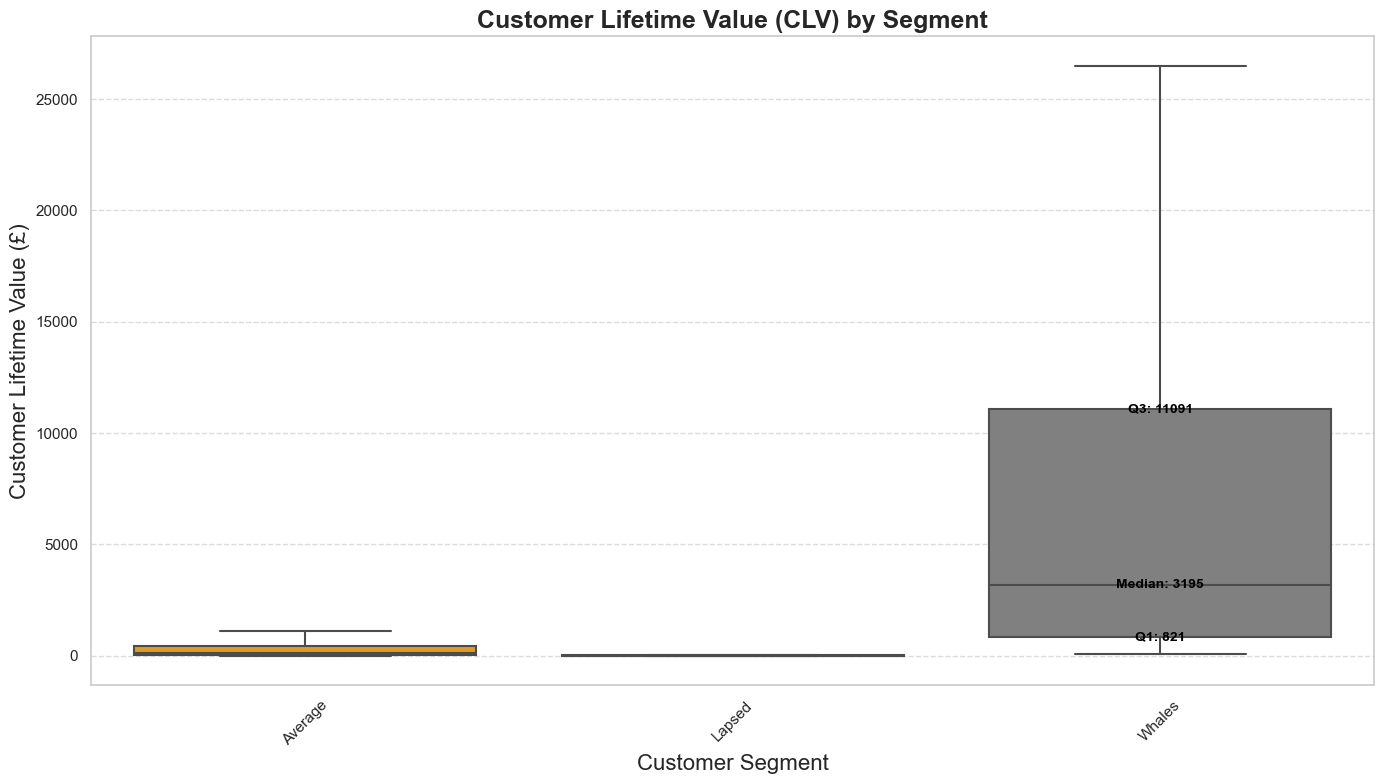

In [83]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Ensure that 'Segment' and 'customer_id' grouping gives unique customers
unique_clv_df = master_df.groupby(['Segment', 'customer_id'])['CLV'].mean().reset_index()

# Set up the plot for CLV box plots by segment
plt.figure(figsize=(14, 8))

# Create boxplot for CLV by segment
sns.boxplot(x='Segment', y='CLV', data=unique_clv_df, palette=['orange', 'lightblue', 'grey'], linewidth=1.5, showfliers=False)

# Add borders to the boxes
for i, box in enumerate(plt.gca().artists):
    box.set_edgecolor('black')
    box.set_linewidth(1.5)

# Annotate the quartiles on the boxplot
segments = unique_clv_df['Segment'].unique()
for i, segment in enumerate(segments):
    clv_data = unique_clv_df[unique_clv_df['Segment'] == segment]['CLV']
    q1 = np.percentile(clv_data, 25)
    median = np.percentile(clv_data, 50)
    q3 = np.percentile(clv_data, 75)

    # Annotate Q1, Median, and Q3
    plt.text(i, q1, f'Q1: {q1:.0f}', ha='center', va='center', fontweight='bold', color='black', fontsize=10)
    plt.text(i, median, f'Median: {median:.0f}', ha='center', va='center', fontweight='bold', color='black', fontsize=10)
    plt.text(i, q3, f'Q3: {q3:.0f}', ha='center', va='center', fontweight='bold', color='black', fontsize=10)

# Add title and labels
plt.title('Customer Lifetime Value (CLV) by Segment', fontsize=18, fontweight='bold')
plt.xlabel('Customer Segment', fontsize=16)
plt.ylabel('Customer Lifetime Value (£)', fontsize=16)
plt.xticks(rotation=45)

# Display grid lines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()
